In [2]:
#importing the required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as nr
import sklearn.model_selection as ms
import seaborn as sns
from sklearn.model_selection import cross_validate
import sklearn.metrics as sklm
from sklearn import linear_model
from sklearn import preprocessing
import math
import scipy.stats as ss
from sklearn import feature_selection as fs

%matplotlib inline

In [3]:
#reading the train and test files in

features = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
print(test.shape)
print(features.shape)

(16496, 18)
(38312, 19)


In [4]:
#recreating new features/columns

def new_name(data, cols):
    for col in cols:
        data[col + '_Str'] = data[col].astype(str)
    
cols = ['Year_of_birth', 'Year_of_recruitment']
new_name(features, cols)
new_name(test, cols)

In [5]:
#dropping unwanted features/columns

features = features.drop(['Year_of_recruitment', 'Year_of_birth'], axis = 1)
test = test.drop(['Year_of_recruitment', 'Year_of_birth'], axis = 1)

print(features.shape)
print(test.shape)

(38312, 19)
(16496, 18)


# DATA VISUALIZATION

In [6]:
#checking the amount of unique values in each feature

def value_count(data, cols):
    for col in cols:
        value = data[col].value_counts().count()
        print('\n' + 'For column' + '                                     ' + col)
        print(value)
        
colss = ['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment',
       'Trainings_Attended', 'Year_of_birth_Str', 'Last_performance_score', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Year_of_birth_Str']


value_count(features, colss)


For column                                     Division
9

For column                                     Qualification
3

For column                                     Gender
2

For column                                     Channel_of_Recruitment
3

For column                                     Trainings_Attended
10

For column                                     Year_of_birth_Str
49

For column                                     Last_performance_score
6

For column                                     Targets_met
2

For column                                     Previous_Award
2

For column                                     Training_score_average
61

For column                                     State_Of_Origin
37

For column                                     Foreign_schooled
2

For column                                     Marital_Status
3

For column                                     Past_Disciplinary_Action
2

For column                                     Previous_Int

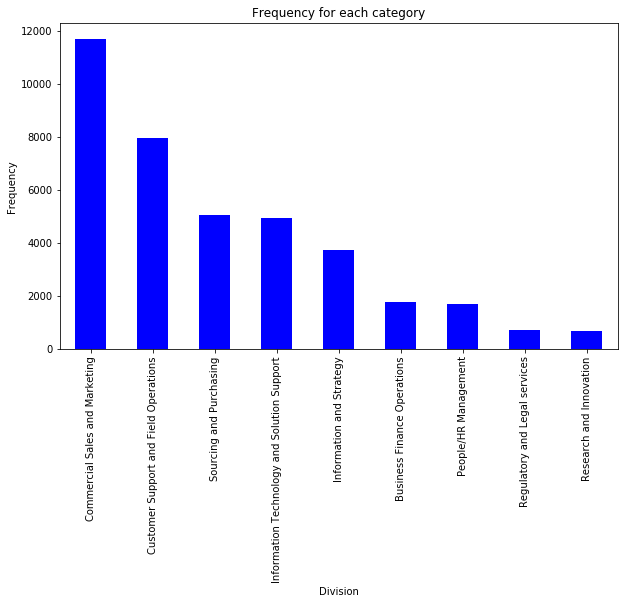

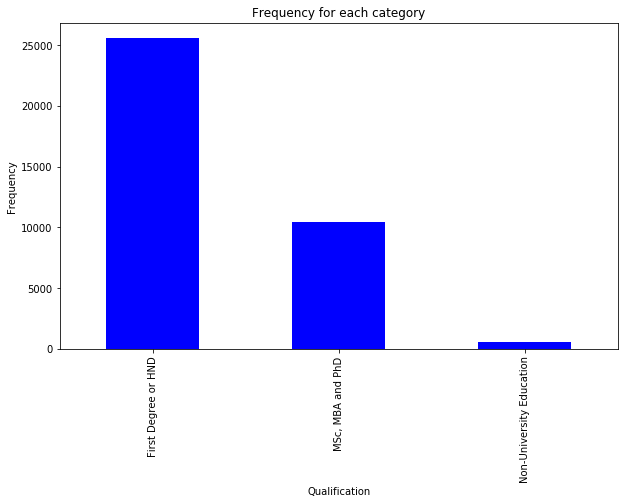

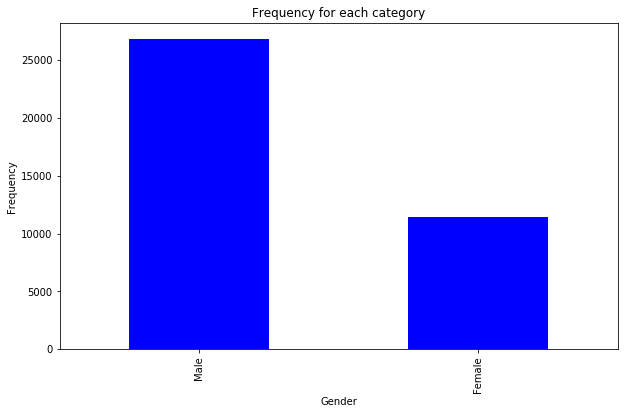

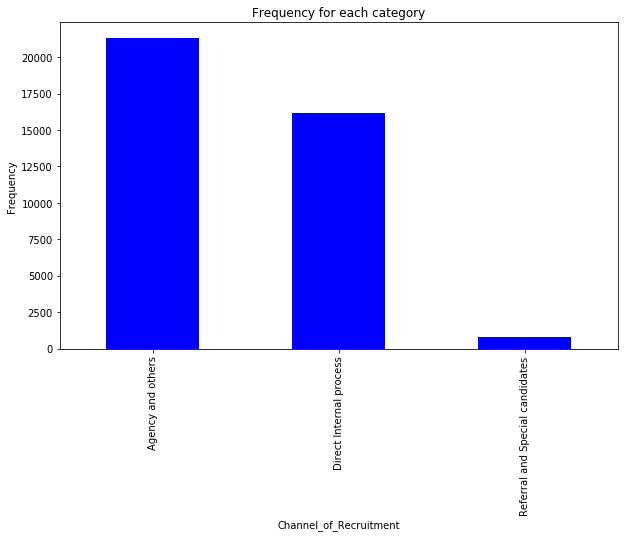

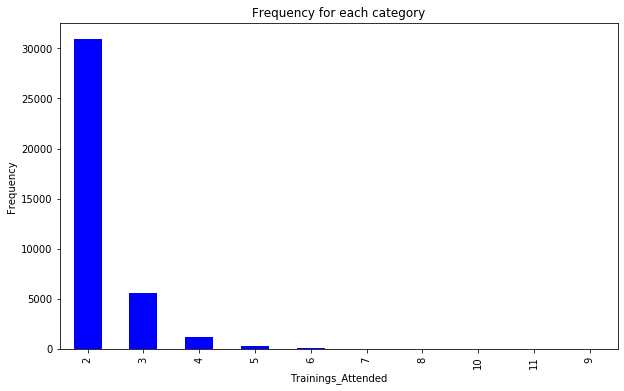

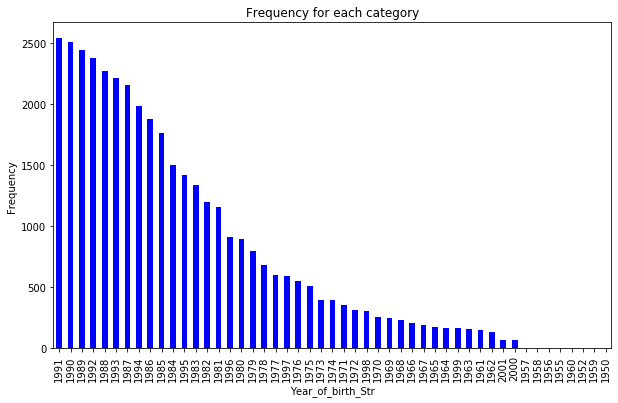

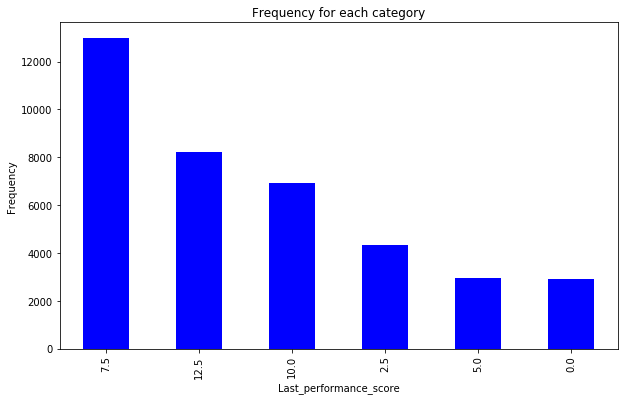

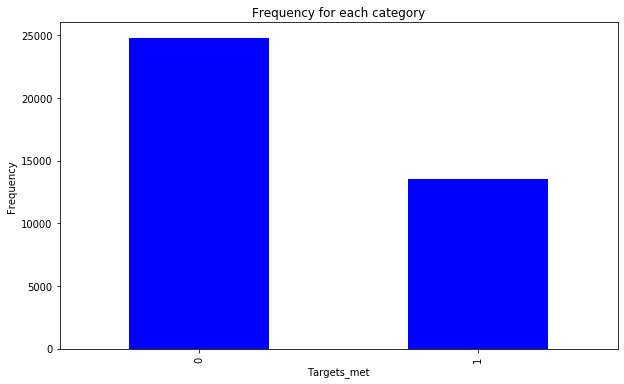

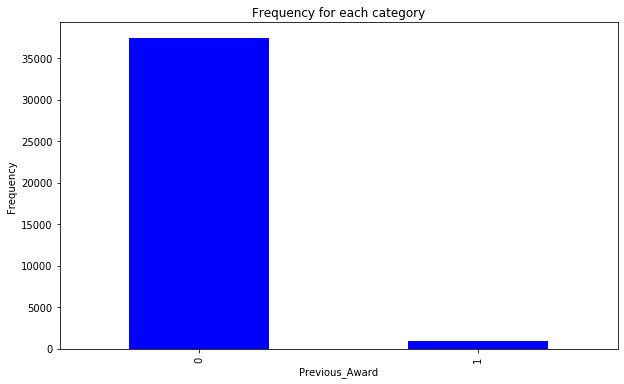

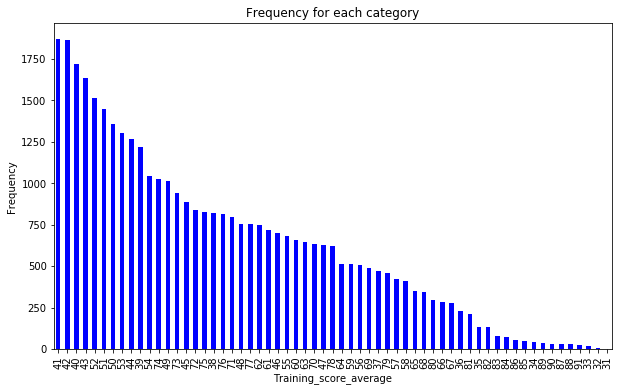

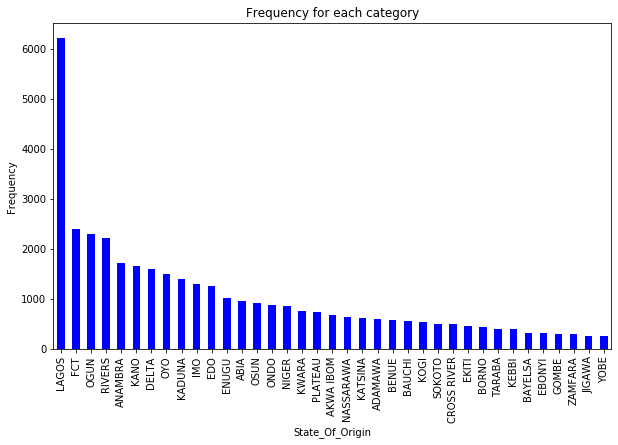

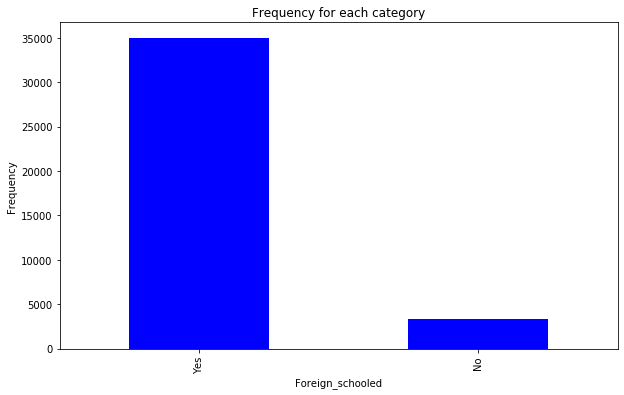

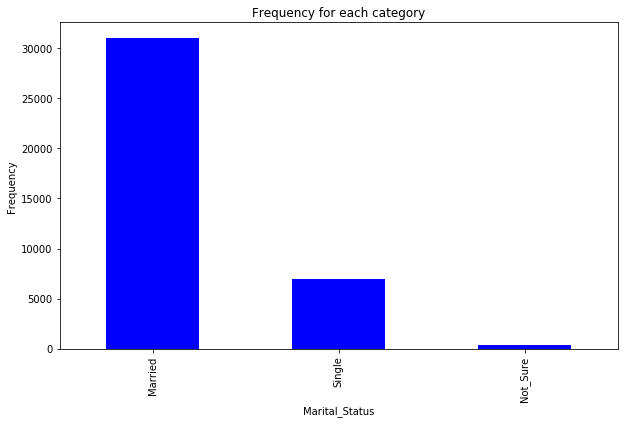

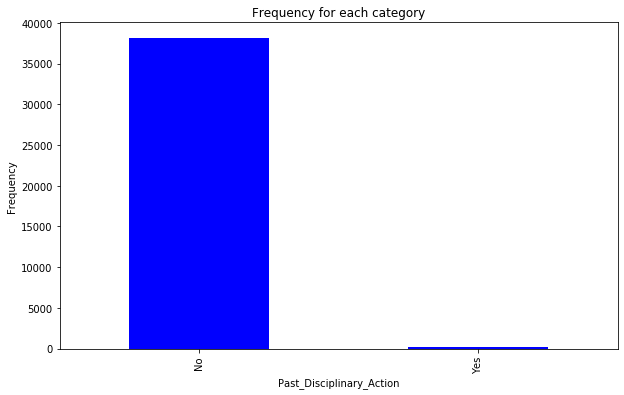

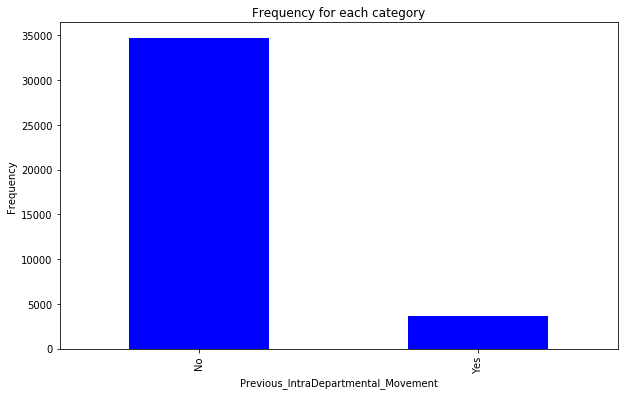

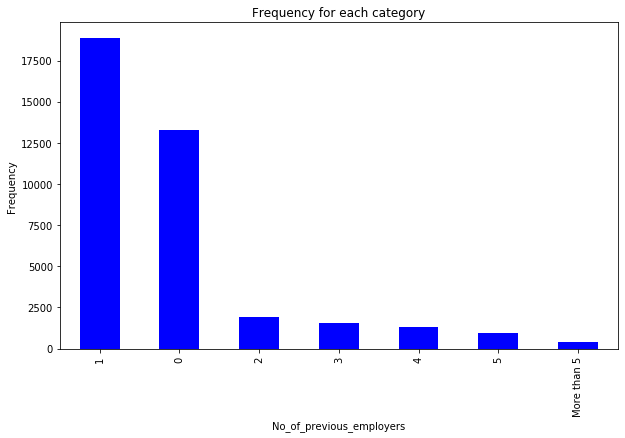

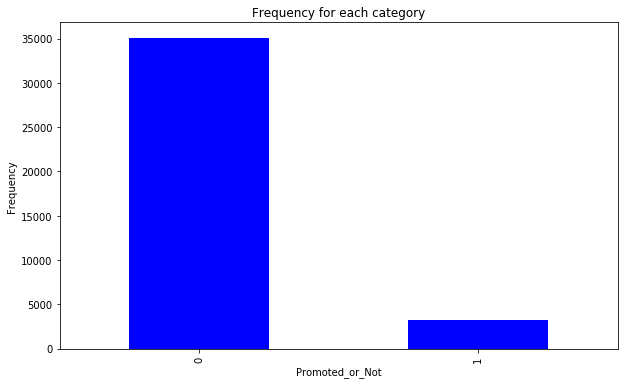

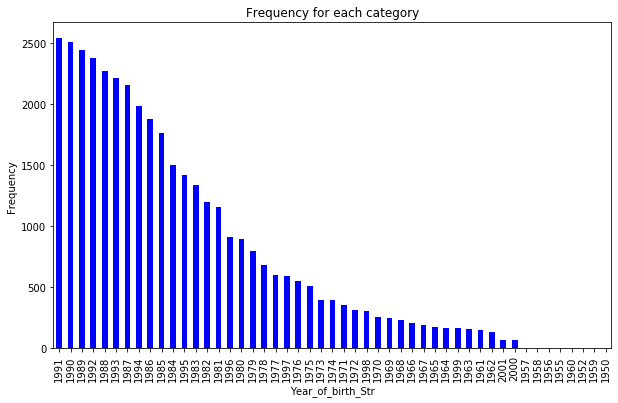

In [8]:
#checking frequency of each feature using bar chart
def plot_bar(data, cols):
    for col in cols:
        ax = data[col].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Frequency for each category", color= 'b')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
plot_bar(features, colss)

# Further Data Preparation

In [9]:
#aggregating categorical variables
#grouping the years into similar categories using a dictionary and list comprehension

year_categories = {'1991': '1990-2001', '1990': '1990-2001', '1989': '1980-1989', '1992': '1990-2001',
                   '1988': '1980-1989', '1987': '1980-1989', '1993': '1990-2001', '1994': '1990-2001',
                  '1986': '1980-1989', '1985': '1980-1989', '1984': '1980-1989', '1995': '1990-2001', 
                  '1983': '1980-1989', '1982': '1980-1989', '1981': '1980-1989', '1980': '1980-1989',
                  '1996': '1990-2001', '1979': '1970-1979', '1978': '1970-1979', '1977': '1970-1979',
                   '1976': '1970-1979', '1975': '1970-1979', '1997': '1990-2001', '1973': '1970-1979',
                   '1974': '1970-1979', '1971': '1970-1979', '1972': '1970-1979', '1970': '1970-1979',
                   '1969': '1950-1969', '1968': '1950-1969', '1998': '1990-2001', '1966': '1950-1969',
                   '1967': '1950-1969', '1965': '1950-1969', '1964': '1950-1969', '1963': '1950-1969',
                   '1961': '1950-1969', '1962': '1950-1969', '1999': '1990-2001', '2001': '1990-2001',
                   '2000': '1990-2001', '1957': '1950-1969', '1956': '1950-1969', '1955': '1950-1969',
                   '1950': '1950-1969', '1952':'1950-1969', '1958': '1950-1969', '1959': '1950-1969',
                   '1960': '1950-1969'}

features['Year_of_birth_Str'] = [year_categories[x] for x in features['Year_of_birth_Str']]
print(features['Year_of_birth_Str'].value_counts())

test['Year_of_birth_Str'] = [year_categories[x] for x in test['Year_of_birth_Str']]
print(test['Year_of_birth_Str'].value_counts())

1980-1989    16611
1990-2001    15163
1970-1979     4853
1950-1969     1685
Name: Year_of_birth_Str, dtype: int64
1980-1989    7172
1990-2001    6489
1970-1979    2057
1950-1969     778
Name: Year_of_birth_Str, dtype: int64


In [10]:
year_categories1 = {'1982': '1982-2000', '1985': '1982-2000', '1986': '1982-2000', '1987': '1982-2000', '1988': '1982-2000', '1989': '1982-2000',
                    '1990': '1982-2000', '1991': '1982-2000', '1992': '1982-2000', '1993': '1982-2000', 
                   '1994': '1982-2000', '1995': '1982-2000', '1996': '1982-2000', '1997': '1982-2000', 
                   '1998': '1982-2000', '1999': '1982-2000', '2000': '1982-2000', '2001': '2001-2005', 
                   '2002': '2001-2005', '2003': '2001-2005', '2004': '2001-2005', '2005': '2001-2005', 
                   '2006': '2006-2010', '2007': '2006-2010', '2008': '2006-2010', '2009': '2006-2010', 
                   '2010': '2006-2010', '2011': '2011-2015', '2012': '2011-2015', '2013': '2011-2015', 
                   '2014': '2011-2015', '2015': '2011-2015', '2016': '2016-2018', '2017': '2016-2018', 
                   '2018': '2016-2018'}

features['Year_of_recruitment_Str'] = [year_categories1[x] for x in features['Year_of_recruitment_Str']]
print(features['Year_of_recruitment_Str'].value_counts())

test['Year_of_recruitment_Str'] = [year_categories1[x] for x in test['Year_of_recruitment_Str']]
print(test['Year_of_recruitment_Str'].value_counts())

2011-2015    18092
2016-2018    12766
2006-2010     5023
2001-2005     1754
1982-2000      677
Name: Year_of_recruitment_Str, dtype: int64
2011-2015    7744
2016-2018    5498
2006-2010    2196
2001-2005     760
1982-2000     298
Name: Year_of_recruitment_Str, dtype: int64


In [11]:
#aggregating the states into similar states

states = {'ABIA': 'EAST', 'ANAMBRA': 'EAST', 'DELTA': 'EAST', 'BAYELSA': 'EAST',
         'ENUGU': 'EAST', 'EBONYI': 'EAST', 'RIVERS': 'EAST', 'CROSS RIVER': 'EAST',
         'AKWA IBOM': 'EAST', 'IMO': 'EAST', 'KATSINA': 'NORTH', 'KANO': 'NORTH', 'NIGER': 'NORTH',
         'SOKOTO': 'NORTH', 'KANO': 'NORTH', 'KADUNA': 'NORTH', 'BORNO': 'NORTH', 'TARABA':'NORTH',
         'YOBE': 'NORTH', 'ADAMAWA': 'NORTH', 'KEBBI': 'NORTH', 'JIGAWA': 'NORTH', 'ZAMFARA': 'NORTH',
         'KEBBI': 'NORTH', 'PLATEAU': 'NORTH', 'NASSARAWA': 'NORTH', 'FCT': 'NORTH', 'PLATEAU': 'NORTH',
         'BENUE': 'NORTH', 'KOGI':'NORTH', 'BAUCHI': 'NORTH', 'GOMBE': 'NORTH', 'OYO': 'WEST', 'LAGOS': 'WEST', 'OGUN': 'WEST',
         'OSUN': 'WEST', 'EKITI': 'WEST', 'ONDO': 'WEST', 'KWARA': 'WEST', 'EDO': 'WEST'}

features['State_Of_Origin'] = [states[x] for x in features['State_Of_Origin']]
print(features['State_Of_Origin'].value_counts())

test['State_Of_Origin'] = [states[x] for x in test['State_Of_Origin']]
print(test['State_Of_Origin'].value_counts())

WEST     14297
NORTH    13402
EAST     10613
Name: State_Of_Origin, dtype: int64
WEST     6259
NORTH    5684
EAST     4553
Name: State_Of_Origin, dtype: int64


In [12]:
#checking the label counts to check for class inbalance

label_count = features['Promoted_or_Not'].value_counts()
label_count

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [13]:
#creating the label into an array matrix

Labels = np.array(features['Promoted_or_Not'])

In [14]:
#Encoding categorical variables

def encode_string(data):
    enc = preprocessing.LabelEncoder()
    enc.fit(data)
    enc_features = enc.transform(data)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_features.reshape(-1,1))
    return encoded.transform(enc_features.reshape(-1,1)).toarray()
    
categorical_columns = ['Gender', 'Channel_of_Recruitment', 'State_Of_Origin',
                       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement',
                       'Year_of_birth_Str', 'Year_of_recruitment_Str']
Features_enc = encode_string(features['Division'])
for col in categorical_columns:
    temp = encode_string(features[col])
    Features_enc = np.concatenate([Features_enc, temp], axis = 1)
    
print(Features_enc.shape)

test_enc = encode_string(test['Division'])
for col in categorical_columns:
    temps = encode_string(test[col])
    test_enc = np.concatenate([test_enc, temps], axis = 1)
    
print(test_enc.shape)

C:\Users\olawale.ibrahim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\olawale.ibrahim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silen

(38312, 35)
(16496, 35)


C:\Users\olawale.ibrahim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\olawale.ibrahim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silen

In [15]:
#concatenating the numerical variables with the categorical variables

Features_enc = np.concatenate([Features_enc, np.array(features[['Trainings_Attended', 'Last_performance_score',
                                                              'Targets_met', 'Previous_Award', 'Training_score_average']])], axis = 1)

print(Features_enc.shape)

test_enc = np.concatenate([test_enc, np.array(test[['Trainings_Attended', 'Last_performance_score',
                                                              'Targets_met', 'Previous_Award', 'Training_score_average']])], axis = 1)

print(test_enc.shape)

(38312, 40)
(16496, 40)


In [16]:
#using StandardScaler function to scale the numeric features 

scaler = preprocessing.StandardScaler().fit(Features_enc[:, 36:])
Features_enc[:, 36:] = scaler.transform(Features_enc[:, 36:])
Features_enc[:, 31:]

array([[ 0.        ,  0.        ,  1.        , ...,  1.35384256,
        -0.15395043, -1.07512768],
       [ 0.        ,  0.        ,  1.        , ..., -0.73863832,
        -0.15395043, -0.25193251],
       [ 0.        ,  0.        ,  1.        , ..., -0.73863832,
        -0.15395043, -1.00029176],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.35384256,
        -0.15395043,  1.16995006],
       [ 0.        ,  0.        ,  0.        , ..., -0.73863832,
        -0.15395043, -1.37447138],
       [ 0.        ,  0.        ,  1.        , ..., -0.73863832,
        -0.15395043, -1.07512768]])

In [17]:
test_enc[:, 36:] = scaler.transform(test_enc[:, 36:])
test_enc[:, 36]

array([-0.05313941, -2.05629819, -0.05313941, ...,  1.28229978,
       -1.3885786 , -0.05313941])

In [18]:
#encoding the year of birth category

birth_encoded = encode_string(features['Year_of_birth_Str'])
birth_encoded_test = encode_string(test['Year_of_birth_Str'])

C:\Users\olawale.ibrahim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\olawale.ibrahim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silen

In [19]:
#concatenating the year of birth(encoded) to the rest of the features

Features_enc = np.concatenate([Features_enc, birth_encoded], axis = 1)
print(Features_enc.shape)

test_enc = np.concatenate([test_enc, birth_encoded_test], axis = 1)
print(test_enc.shape)

(38312, 44)
(16496, 44)


In [20]:
#aggregating the number of previous employers

employers = {'0': '0-1', '1': '0-1', '2': '2-3', '3': '2-3',
             '4': 'Greater than 3', '5': 'Greater than 3', 'More than 5': 'Greater than 5'}

features['No_of_previous_employers'] = [employers[x] for x in features['No_of_previous_employers']]
test['No_of_previous_employers'] = [employers[x] for x in test['No_of_previous_employers']]

print(features['No_of_previous_employers'].value_counts())
print(test['No_of_previous_employers'].value_counts())

0-1               32139
2-3                3505
Greater than 3     2267
Greater than 5      401
Name: No_of_previous_employers, dtype: int64
0-1               13931
2-3                1469
Greater than 3      940
Greater than 5      156
Name: No_of_previous_employers, dtype: int64


In [21]:
#encoding the number of previous employers(encoded) category

employers_encodedd = encode_string(features['No_of_previous_employers'])
employers_encoded_testt = encode_string(test['No_of_previous_employers'])

C:\Users\olawale.ibrahim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\olawale.ibrahim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silen

In [22]:
Features_enc = np.concatenate([Features_enc, employers_encodedd], axis = 1)
print(Features_enc.shape)

test_enc = np.concatenate([test_enc, employers_encoded_testt], axis = 1)
print(test_enc.shape)

(38312, 48)
(16496, 48)


In [23]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features_enc.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features_enc[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features_enc[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [25]:
#importing XGBoost classifier 

import xgboost as xgb

In [26]:
xg_cl1 = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 4000, seed = 123, max_depth = 8,
                           learning_rate=0.01, booster = 'gbtree', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

In [27]:
eval_set = [(x_train, y_train), (x_test, y_test)]
xg_cl1.fit(x_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=True, early_stopping_rounds = 200)

[0]	validation_0-auc:0.863699	validation_1-auc:0.850604
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.882769	validation_1-auc:0.881033
[2]	validation_0-auc:0.885067	validation_1-auc:0.884101
[3]	validation_0-auc:0.888418	validation_1-auc:0.889068
[4]	validation_0-auc:0.88888	validation_1-auc:0.88875
[5]	validation_0-auc:0.89105	validation_1-auc:0.889251
[6]	validation_0-auc:0.893914	validation_1-auc:0.891274
[7]	validation_0-auc:0.89391	validation_1-auc:0.893243
[8]	validation_0-auc:0.893892	validation_1-auc:0.893121
[9]	validation_0-auc:0.893736	validation_1-auc:0.892812
[10]	validation_0-auc:0.89383	validation_1-auc:0.893147
[11]	validation_0-auc:0.893662	validation_1-auc:0.893058
[12]	validation_0-auc:0.894148	validation_1-auc:0.893369
[13]	validation_0-auc:0.894052	validation_1-auc:0.893776
[14]	validation_0-auc:0.894234	validation_1-auc:0.893879
[1

[141]	validation_0-auc:0.915736	validation_1-auc:0.905835
[142]	validation_0-auc:0.91587	validation_1-auc:0.905752
[143]	validation_0-auc:0.915887	validation_1-auc:0.905773
[144]	validation_0-auc:0.915984	validation_1-auc:0.90579
[145]	validation_0-auc:0.916024	validation_1-auc:0.905833
[146]	validation_0-auc:0.916058	validation_1-auc:0.905799
[147]	validation_0-auc:0.916063	validation_1-auc:0.905863
[148]	validation_0-auc:0.916157	validation_1-auc:0.905937
[149]	validation_0-auc:0.916235	validation_1-auc:0.905994
[150]	validation_0-auc:0.916286	validation_1-auc:0.905959
[151]	validation_0-auc:0.916342	validation_1-auc:0.905896
[152]	validation_0-auc:0.916464	validation_1-auc:0.905879
[153]	validation_0-auc:0.916593	validation_1-auc:0.905883
[154]	validation_0-auc:0.916624	validation_1-auc:0.905851
[155]	validation_0-auc:0.91674	validation_1-auc:0.905736
[156]	validation_0-auc:0.916841	validation_1-auc:0.905749
[157]	validation_0-auc:0.916906	validation_1-auc:0.905673
[158]	validation_

[283]	validation_0-auc:0.928466	validation_1-auc:0.9096
[284]	validation_0-auc:0.928566	validation_1-auc:0.909542
[285]	validation_0-auc:0.928621	validation_1-auc:0.909524
[286]	validation_0-auc:0.928667	validation_1-auc:0.909492
[287]	validation_0-auc:0.928734	validation_1-auc:0.909447
[288]	validation_0-auc:0.928882	validation_1-auc:0.909558
[289]	validation_0-auc:0.929025	validation_1-auc:0.909622
[290]	validation_0-auc:0.929082	validation_1-auc:0.909575
[291]	validation_0-auc:0.929143	validation_1-auc:0.909601
[292]	validation_0-auc:0.929209	validation_1-auc:0.909622
[293]	validation_0-auc:0.929304	validation_1-auc:0.909704
[294]	validation_0-auc:0.929357	validation_1-auc:0.909773
[295]	validation_0-auc:0.929425	validation_1-auc:0.909787
[296]	validation_0-auc:0.929564	validation_1-auc:0.909781
[297]	validation_0-auc:0.929615	validation_1-auc:0.90976
[298]	validation_0-auc:0.929889	validation_1-auc:0.909784
[299]	validation_0-auc:0.930006	validation_1-auc:0.90981
[300]	validation_0

[425]	validation_0-auc:0.941024	validation_1-auc:0.910583
[426]	validation_0-auc:0.941064	validation_1-auc:0.910587
[427]	validation_0-auc:0.9412	validation_1-auc:0.910556
[428]	validation_0-auc:0.941319	validation_1-auc:0.910559
[429]	validation_0-auc:0.941384	validation_1-auc:0.910583
[430]	validation_0-auc:0.941461	validation_1-auc:0.910562
[431]	validation_0-auc:0.941529	validation_1-auc:0.910545
[432]	validation_0-auc:0.941699	validation_1-auc:0.910625
[433]	validation_0-auc:0.941773	validation_1-auc:0.910664
[434]	validation_0-auc:0.941842	validation_1-auc:0.910674
[435]	validation_0-auc:0.94195	validation_1-auc:0.910663
[436]	validation_0-auc:0.942108	validation_1-auc:0.910701
[437]	validation_0-auc:0.942158	validation_1-auc:0.910693
[438]	validation_0-auc:0.942196	validation_1-auc:0.910678
[439]	validation_0-auc:0.942296	validation_1-auc:0.910687
[440]	validation_0-auc:0.942359	validation_1-auc:0.910651
[441]	validation_0-auc:0.942424	validation_1-auc:0.910611
[442]	validation_

[567]	validation_0-auc:0.950431	validation_1-auc:0.910473
[568]	validation_0-auc:0.950439	validation_1-auc:0.910514
[569]	validation_0-auc:0.950452	validation_1-auc:0.910497
[570]	validation_0-auc:0.950496	validation_1-auc:0.910471
[571]	validation_0-auc:0.950508	validation_1-auc:0.910453
[572]	validation_0-auc:0.950592	validation_1-auc:0.910467
[573]	validation_0-auc:0.950637	validation_1-auc:0.910523
[574]	validation_0-auc:0.950688	validation_1-auc:0.910507
[575]	validation_0-auc:0.950733	validation_1-auc:0.910526
[576]	validation_0-auc:0.950782	validation_1-auc:0.910516
[577]	validation_0-auc:0.950803	validation_1-auc:0.910535
[578]	validation_0-auc:0.950886	validation_1-auc:0.910523
[579]	validation_0-auc:0.950931	validation_1-auc:0.910549
[580]	validation_0-auc:0.951002	validation_1-auc:0.91057
[581]	validation_0-auc:0.951047	validation_1-auc:0.91057
[582]	validation_0-auc:0.951123	validation_1-auc:0.910566
[583]	validation_0-auc:0.951173	validation_1-auc:0.910551
[584]	validation

XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=4000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.03, scale_pos_weight=1, seed=123,
              silent=None, subsample=0.8, verbosity=1)

In [29]:
#making predictions on the test data

preds1 = xg_cl1.predict(test_enc)

In [31]:
#preparing the predictions make into the sample file for submission

sample1 = pd.read_csv('sample_submission2.csv')
sample1.EmployeeNo = test.EmployeeNo
sample1.Promoted_or_Not = preds1
sample1.to_csv('intercampus1.csv', index = False)